# Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load data

In [2]:
data=pd.read_csv('bangalore house price prediction.csv')

In [3]:
data.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
x=data.drop('price', axis=1)
y=data['price']

print('Shape of X = ', x.shape)
print('Shape of y = ', y.shape)

# standard scaler

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler=StandardScaler()

In [7]:
x_scaled=scaler.fit_transform(x)

# train test split

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=51)

# create model

In [9]:
from sklearn.tree import DecisionTreeRegressor

In [10]:
dreg=DecisionTreeRegressor(criterion='mse',max_depth=5)

In [11]:
dreg.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [12]:
pred=dreg.predict(x_test)

# Selecting best max_depth¶

In [13]:
from sklearn.model_selection import cross_val_score

In [14]:
accuracy_rate=[]
for i in range(1,30):
    dreg=DecisionTreeRegressor(criterion='mse',max_depth=i)
    score=cross_val_score(dreg,x_scaled,y,cv=5)
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'accuracy rate')

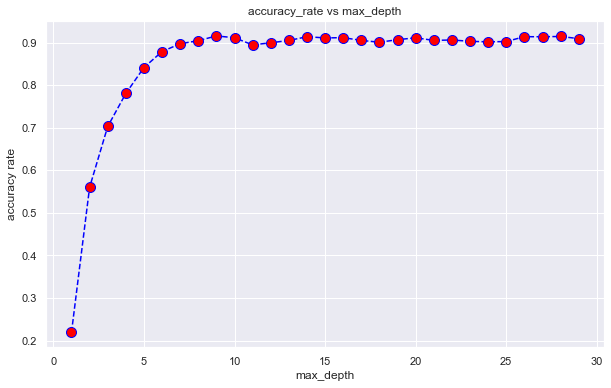

In [15]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),accuracy_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('accuracy_rate vs max_depth')
plt.xlabel('max_depth')
plt.ylabel('accuracy rate')

here we can see at max_depth=10 graph does not coming down

In [16]:
dreg=DecisionTreeRegressor(criterion='mse',max_depth=10)

In [17]:
dreg.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10)

In [18]:
y_pred=dreg.predict(x_test)

# R_square

In [37]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8674237878404377

# Adjusted_r2

In [20]:
def adj(x,y):
    r2=dreg.score(x,y)
    n=x.shape[0]
    p=x.shape[1]
    adjusted_r2=1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [21]:
adj(x_test,y_test)

0.8566444149672818

In [40]:
r2=dreg.score(x_test,y_test)
r2

0.8674237878404377

here we can see r_square is better than adjusted_r2

In [22]:
# Finally, let's manually check these predictions
df_pf = pd.DataFrame(y_pred, columns=['Prediction'])
df_pf.head()

,Prediction
0,85.513667
1,38.730517
2,120.647059
3,79.626875
4,44.983333


In [23]:
y_test = y_test.reset_index(drop=True)

In [24]:
df_pf['Target']=y_test

In [25]:
df_pf

,Prediction,Target
0,85.513667,80.00
1,38.730517,40.00
2,120.647059,120.00
3,79.626875,79.00
4,44.983333,45.00
...,...,...
1419,31.979815,28.34
1420,84.666667,84.00
1421,34.390000,32.00
1422,62.819130,63.00


# MODEL EVALUTION

In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
mse=mean_squared_error(y_pred,y_test)

In [28]:
mse

2663.8454672211224

# Root mean square error

In [29]:
rmse=np.sqrt(mse)
print(rmse)

51.612454574657875
